<a href="https://colab.research.google.com/github/Lidivinekeng/Prediction_of_product_sales/blob/main/lidivine_kengne_sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prediction of product sales



*   Author : Lidivine Kengne



## project overview

##load and inspect data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
# MissingNo
import missingno as msno

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_prediction = "/content/drive/MyDrive/Colab Notebooks/sales_predictions_2023.csv"
df = pd.read_csv(df_prediction)

###.head()

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##clean data

1) How many rows and columns?

In [8]:
print (f'we have {len(df)}rows and {len(df.columns)}columns.')

we have 8523rows and 12columns.


2) What are the datatypes of each variable?

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) duplicates value

In [10]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

4) Identify missing values.

In [11]:
# Get the number of null values for all columns and save as a variable
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Address the missing values by using a placeholder value.

In [12]:
# Saving list of column names for object cols
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
# Using the list of cat_cols to fillna
df[cat_cols] = df[cat_cols].fillna("MISSING")
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [14]:
# save list of numeric column names (Hint: select_dtypes)
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
# use the list of num columns to fill null values with -1
df[num_cols]  = df[num_cols].fillna(-1)
df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

6) Confirm that there are no missing values after addressing them.

In [16]:
# Confirm no more nulls using Pandas
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [17]:
# Save a list of object columns (Hint: select_dtypes)
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
df[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [19]:
# Remake the list of string columns
string_cols = df.select_dtypes("object").columns
string_cols
# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [20]:
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
# Replace "LF", "Low Fat"with "low fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"low fat", "Low Fat" :"low fat",})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [22]:
# Replace "Regular", with "reg "
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"Regular":"reg"})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [23]:
df_num = df.select_dtypes(exclude= ['object'])

In [24]:
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##exploratory data analysis

#### Histograms to view the distributions of numerical features in your dataset

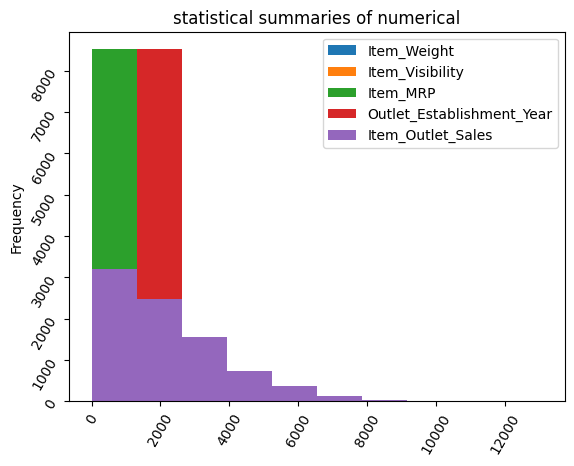

In [48]:
# Histograms to view the distributions of numerical features in your dataset
ax = df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']].plot(kind= 'hist')
 ## Rotate the tick values
ax.tick_params(rotation = 60)

## Set the Title
ax.set_title('statistical summaries of numerical');

###Boxplots to view statistical summaries of numerical features in your dataset

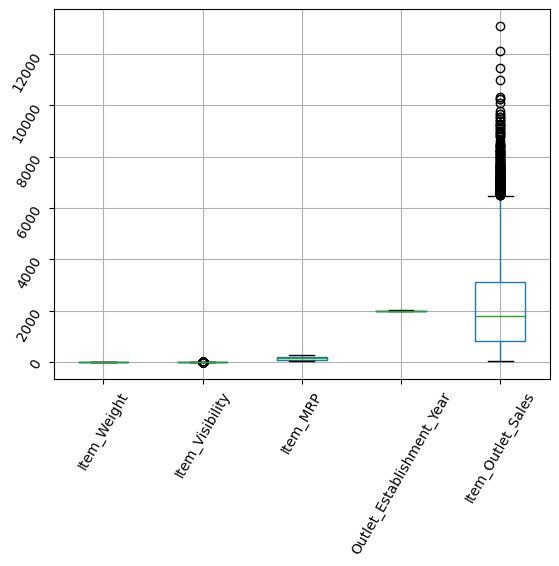

In [64]:
#Boxplots to view statistical summaries of numerical features in your dataset
## Create a boxplot
ax = df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']].boxplot()
       ## Rotate the tick values
ax.tick_params(rotation = 60)


###Countplots to view the frequency of each class of categorial features in your dataset.

In [65]:
#define categorical
ca_cols = df.select_dtypes('object').columns
ca_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

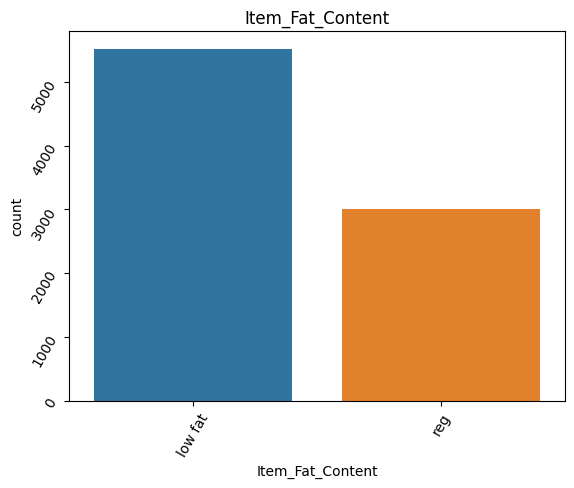

In [73]:
#Countplots to view item_fat_content
ax = sns.countplot(x = 'Item_Fat_Content' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Item_Fat_Content');

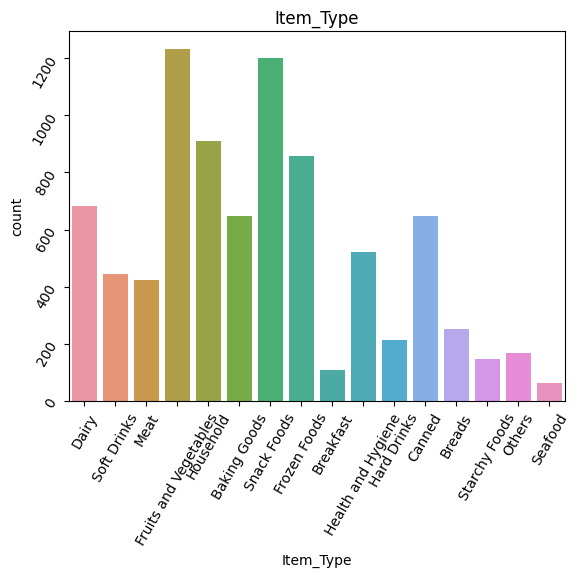

In [74]:
#Countplots to view for item_type
ax = sns.countplot(x = 'Item_Type' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Item_Type');

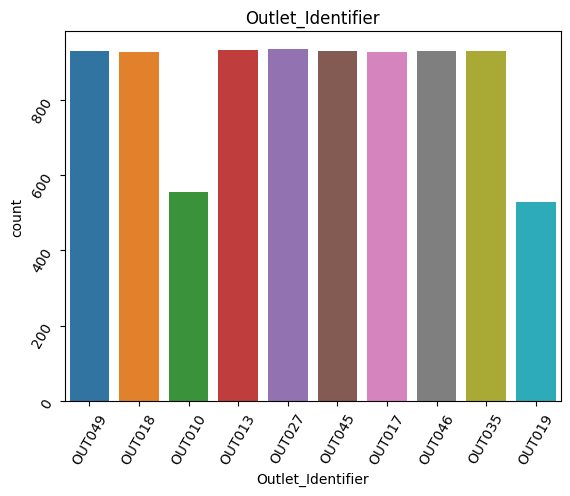

In [75]:
#Countplots to view for outlet_identifier
ax = sns.countplot(x = 'Outlet_Identifier' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Outlet_Identifier');

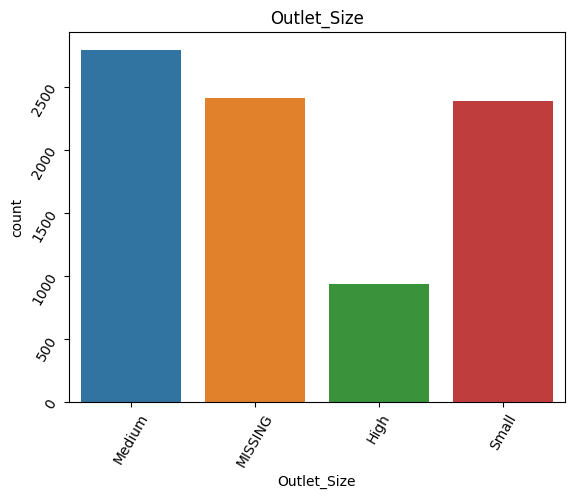

In [76]:
#Countplots to view for outlet_size
ax = sns.countplot(x = 'Outlet_Size', data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Outlet_Size');

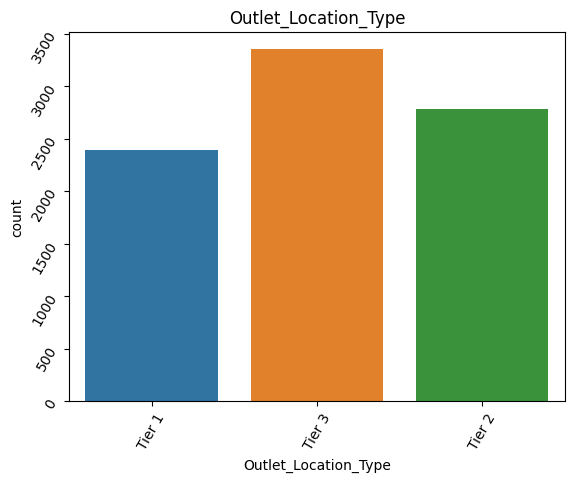

In [70]:
#Countplots to view for outlet_location_type
ax = sns.countplot(x = 'Outlet_Location_Type', data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Outlet_Location_Type');

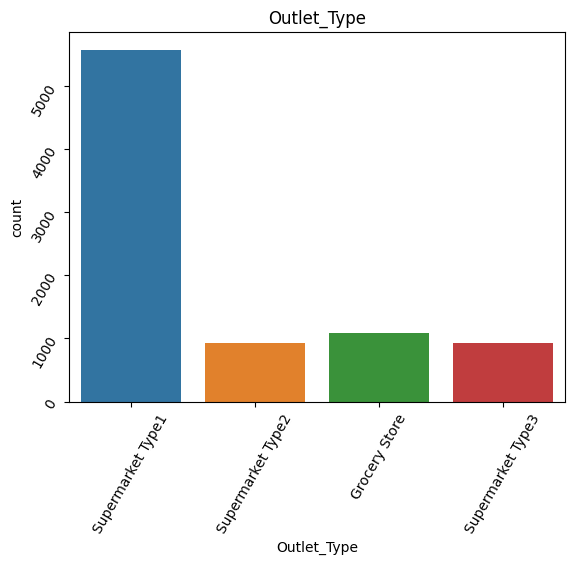

In [77]:
#Countplots to view for outlet_type
ax = sns.countplot(x = 'Outlet_Type' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title( 'Outlet_Type');

In [72]:
# Heatmap to view the correlation between features.
# Find correlations
corr = df.corr()
# tabular view of correlation values
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


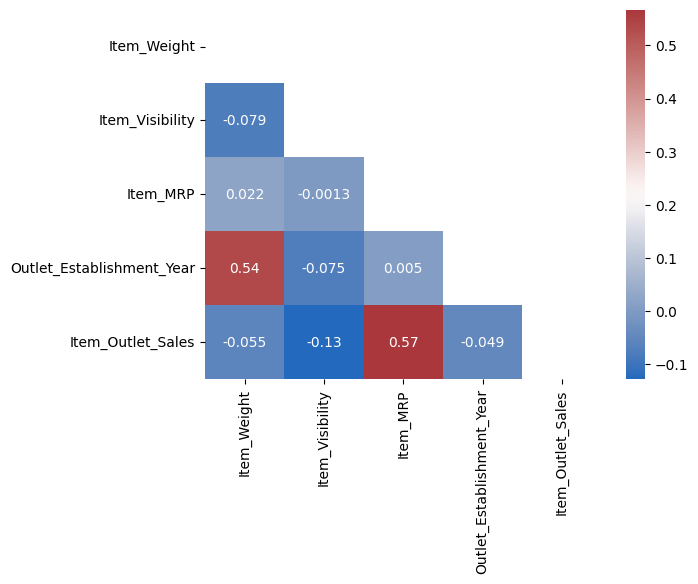

In [27]:
# Make a heatmap using the correlations from above
## Define a MatplotLib ax object using sns.heatmap()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, cmap= 'vlag', annot = True , mask = mask);

##feature inspection